<left><img width=100% height=100% src="img/itu_logo.png"></left>

## Lecture 02: Multiple Linear Regression and Optimization (OLS)

### __Gül İnan__<br><br>Istanbul Technical University

## The Delivery Time Data

A soft drink bottler is analyzing the vending machine service routes in his distribution system. 
He is interested in predicting the `amount of time required` by the route driver to service the vending machines in an outlet. This service activity includes stocking the machine with beverage products and minor maintenance or housekeeping. 
The industrial engineer responsible for the study has suggested that the
two most important variables affecting the `delivery time` (y) are the `number of cases
of product stocked` ($x_1$) and the `distance walked by the route driver` ($x_2$). 
The engineer has collected 25 observations on delivery time. The delivery time data can be seen below:

In [10]:
#import data set
import pandas as pd
delivery_df = pd.read_csv('datasets/delivery.csv', index_col=0)
delivery_df.head()

,n.prod,distance,delTime
1,7,560,16.68
2,3,220,11.50
3,3,340,12.03
4,4,80,14.88
5,6,150,13.75


In [11]:
#rename the first column since it includes .
delivery_df.rename({'n.prod':'nprod'}, axis = 1, inplace = True)
#delivery_df.columns = ['nprod', 'distance', 'delTime'] #alternatively

In [12]:
delivery_df

,nprod,distance,delTime
1,7,560,16.68
2,3,220,11.50
3,3,340,12.03
4,4,80,14.88
5,6,150,13.75
6,7,330,18.11
7,2,110,8.00
8,7,210,17.83
9,30,1460,79.24
10,5,605,21.50


In [13]:
delivery_df.shape

(25, 3)

Can we build a predictive model for the `amount of time required for delivery` based on `number of cases
of product stocked` and the `distance walked by the route driver`? 

## A Model Class: Multiple Linear Regression Model 

Remember that a `multiple linear regression model` assumes the following form at an _individual level_:

$$
y_i  &= \theta_0 + \theta_1 \cdot x_{i1} + \theta_2 \cdot x_{i2} + ... + \theta_d \cdot x_{id} + \epsilon_i, \\
     &= \boldsymbol{\theta}^\top \textbf{x}_i + \epsilon_i,
$$

where $\boldsymbol{\theta}=(\theta_0,\theta_1,\ldots,\theta_d)^T$, $\textbf{x}_i=(1,x_{i1}, \ldots,x_{id})^T$,
and each $\epsilon_i \sim N(0,\sigma^2)$ for $i=1,\ldots,n$.

## Multiple Linear Regression Model in Matrix Form

Since $\textbf{y} \in \mathbb{R}^{n \times 1}$, $\textbf{X} \in \mathbb{R}^{n \times (d+1)}$, $\boldsymbol{\theta} \in \mathbb{R}^{(d+1) \times 1}$, and  $\boldsymbol{\epsilon} \in \mathbb{R}^{n \times 1}$, with the following forms, respectively:

$$ 
\textbf{y} = \begin{bmatrix}
y_{1} \\
y_{2} \\
\vdots \\
y_{n}
\end{bmatrix}, \quad
\textbf{X} = \begin{bmatrix}
1 & x_{11} & x_{12} & \ldots & x_{1d} \\
1 & x_{21} & x_{22} & \ldots & x_{2d} \\
\vdots  &    \vdots    &  \vdots      &  \vdots \\
1 & x_{n1} & x_{n2} & \ldots & x_{nd} \\
\end{bmatrix}, \quad 
\boldsymbol{\theta} =\begin{pmatrix}
\theta_0\\
\theta_1 \\
\vdots \\
\theta_d \\
\end{pmatrix}, \quad \text{and} \quad 
\boldsymbol{\epsilon} = \begin{bmatrix}
\epsilon_{1} \\
\epsilon_{2} \\
\vdots \\
\epsilon_{n}
\end{bmatrix}.
$$

The `multiple linear regression model` can be written in the **matrix form** at the _population level_:


\begin{equation}
\mathbf{y}=\mathbf{X}\boldsymbol{\theta} + \boldsymbol{\epsilon}, \nonumber
\end{equation}

where each $\epsilon_i \sim N(0,\sigma^2)$.

## Mean Squared Error in Matrix Form

Recall that we may fit a linear model by choosing $\boldsymbol{\theta}$ that minimizes the mean squared error:

\begin{align*}
J(\boldsymbol{\theta})
         &= \frac{1}{2n} \sum_{i=1}^n \left(y_{i}- f_\theta(\textbf{x}_i)\right)^2 \\
         &= \frac{1}{2n} \sum_{i=1}^n(y_{i}-\boldsymbol{\theta}^\top \textbf{x}_i)^2.
\end{align*}

We can also write the **mean squared error** above in `matrix-vector form` as:

$$
J(\boldsymbol{\theta}) = \frac{1}{2n} \|\textbf{y}-X\boldsymbol{\theta}\|^2_2,
$$
where $\|\cdot\|_2=\sqrt{\sum_{i=1}^n|y_{i}-\boldsymbol{\theta}^\top \textbf{x}_i|^2}$ denotes the Euclidean norm in here.

Then, the `least-squares estimate` of $\boldsymbol{\theta}$ can be obtained as the solution to the following **optimization** problem:

$$
\widehat{\boldsymbol{\theta}}_{OLS} = \underset{\theta \in \mathbb{R}}{argmin}   J(\boldsymbol{\theta}) = \underset{\theta \in \mathbb{R}}{argmin} \frac{1}{2n} \|\textbf{y}-X\boldsymbol{\theta}\|^2_2.
$$

This is a slight different formulation given in [scikit-learn](https://scikit-learn.org/stable/modules/linear_model.html) documentation.

To minimize $J(\boldsymbol{\theta})$, we should take partial derivatives with respect to each $\theta_j$ ($j=0,1,\ldots,d$), set them to zero, and solve the resulting system of equations simultaneously.

### The Gradient of the Mean Squared Error

We can find the `gradient vector` of the objective function $J(\boldsymbol{\theta})=\frac{1}{2n} \|\textbf{y}-X\boldsymbol{\theta}\|^2_2=\frac{1}{2n}(\mathbf{y}-\mathbf{X}\theta)^{T}(\mathbf{y}-\mathbf{X}\theta)$ with respect to $\boldsymbol{\theta}$ such that:


\begin{equation}
\nabla J(\boldsymbol{\theta})=
\frac{\partial J(\boldsymbol{\theta})}{\partial \boldsymbol{\theta}} =\begin{pmatrix}
\frac{\partial J(\boldsymbol{\theta})}{\partial \theta_0}\\
\frac{\partial J(\boldsymbol{\theta})}{\partial \theta_1}\\
\vdots \\
\frac{\partial J(\theta)}{\partial \theta_d}\\
\end{pmatrix}. \nonumber
\end{equation}  



Let's expand $J(\boldsymbol{\theta})$ first:


\begin{eqnarray}
\begin{split}
J(\boldsymbol{\theta})&=\frac{1}{2n}(\mathbf{y}-\mathbf{X}\theta)^{T}(\mathbf{y}-\mathbf{X}\theta)\\
 &= \frac{1}{2n}\big((\mathbf{y}^{T}-\theta^{T}\mathbf{X}^{T})(\mathbf{y}-\mathbf{X}\theta)\big)  \\
 &= \frac{1}{2n}\big(\mathbf{y}^{T}\mathbf{y}-\mathbf{y}^{T}\mathbf{X}\theta-\theta^T\mathbf{X}^T\mathbf{y}+\theta^{T}\mathbf{X}^{T}\mathbf{X}\theta\big) \\
&=\frac{1}{2n}\big(\mathbf{y}^{T}\mathbf{y}-2\mathbf{y}^{T}\mathbf{X}\theta+\theta^{T}\mathbf{X}^{T}\mathbf{X}\theta\big), \nonumber
\end{split}
\end{eqnarray}

since the dot product $\mathbf{y}^{T}\mathbf{X}\theta$ is scalar, $(\mathbf{y}^{T}\mathbf{X}\theta)^{T} = (\theta^{T}\mathbf{X}^{T}y)$.

Applying the rules for **differentiation of a scalar with respect to a vector**, we get:

\begin{eqnarray}
\nabla J(\boldsymbol{\theta})=\frac{\partial J(\boldsymbol{\theta})}{\partial \boldsymbol{\theta}} =\frac{1}{n}(-\mathbf{X}^{T}\mathbf{y} + \mathbf{X}^{T}\mathbf{X}\theta), \nonumber
\end{eqnarray}

since $\frac{\partial a^{T}\beta}{\partial \beta}=a$ and $\frac{\partial \beta^{T}\mathbf{S} \beta}{\partial \beta}=2\mathbf{S}\beta$, where $\mathbf{S}$ is a symmetric matrix.

### Normal Equations

<!-- We know from calculus that a function is minimized when its derivative is set to zero. In our case, our objective function is a (multivariate) quadratic; hence it only has one minimum, which is the global minimum.
 -->
Setting the gradient vector $\nabla J(\theta)=0$, we obtain the `normal equations`:

$$ 
(\mathbf{X}^\top \mathbf{X}) \boldsymbol{\theta} = \mathbf{X}^\top y.
$$

`Important Note`: Here we assume that **the number of columns in** $\mathbf{X}$ is less than the number of rows such as $(d+1)<n$ and the rank of $\mathbf{X}$ is $(d+1)$, hence $\mathbf{X}$ has a **full column rank** $(d+1)$. Since $rank(\mathbf{X}^{T}\mathbf{X})=rank(\mathbf{X})=(d+1)$, this leads the symmetric matrix $\mathbf{X}^{T}\mathbf{X}$ to has a **full rank** of $(d+1)$. In this case $\det(\mathbf{X}^{T}\mathbf{X}) \neq 0$, that the square matrix $\mathbf{X}^{T}\mathbf{X}$ is non-singular and, in turn, is **invertible**.

### Least-squares estimators

Then the normal equations yield the `least-squares estimator` of $\boldsymbol{\theta}$ as:

\begin{eqnarray}
\hat{\boldsymbol{\theta}}_{OLS} = (\mathbf{X}^{T}\mathbf{X})^{-1}\mathbf{X}^{T}\mathbf{y},\nonumber
\end{eqnarray}

where $\mathbf{X}^{T}\mathbf{X}$ is a $(d+1) \times (d+1)$ **symmetric matrix** and $\mathbf{X}^{T}\mathbf{y}$ is a $(d+1) \times 1$ vector.
Note that $\mathbf{X}^{T}\mathbf{X}$ is also known as [Gram matrix](https://inst.eecs.berkeley.edu/~ee127/sp21/livebook/def_Gram_matrix.html) of $\mathbf{X}$.

### Fitted Value Vector

The **fitted value** vector of $\mathbf{\mathbf{y}}$ is:


\begin{eqnarray}
\hat{\mathbf{y}} = \mathbf{X}\hat{\boldsymbol{\theta}} =  \mathbf{X} (\mathbf{X}^{T}\mathbf{X})^{-1}\mathbf{X}^{T} \mathbf{y}.\nonumber
\end{eqnarray}

## Revisit the Delivery Time Data

Let's build a predictive model for the `amount of time required for delivery` based on `number of cases
of product stocked` and the `distance walked by the route driver` through  a multiple linear regression model:

$$
\text{DelTime}_i  = \theta_0 + \theta_1 \cdot x_{i_{nprod}} + \theta_2 \cdot x_{i_{distance}} + \epsilon_i,
$$

where $i=1,\ldots,n$. 

In this sense, let's split 80% of the data as training data and keep the remaining 20% of the data as new (test) data, and the build a predictive model on it. 

In [14]:
#Prepare the data set

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

# Use two features
delivery_X = delivery_df[['nprod', 'distance']] #returns a pandas df 
delivery_y = delivery_df['delTime']

# Split 80:20
delivery_X_train, delivery_X_test, delivery_y_train, delivery_y_test = train_test_split(delivery_X,delivery_y, test_size=0.2, random_state=1500)

In [15]:
print(delivery_X_train.shape)  #acceptable data format by sckitlearn
print(delivery_X_test.shape)
print(delivery_y_train.shape)  #acceptable data format by sckitlearn
print(delivery_y_test.shape)

(20, 2)
(5, 2)
(20,)
(5,)


Let's investigate the relationship between the `number of cases
of product stocked` and `delivery time` and  `distance walked by the route driver` and `delivery time`.

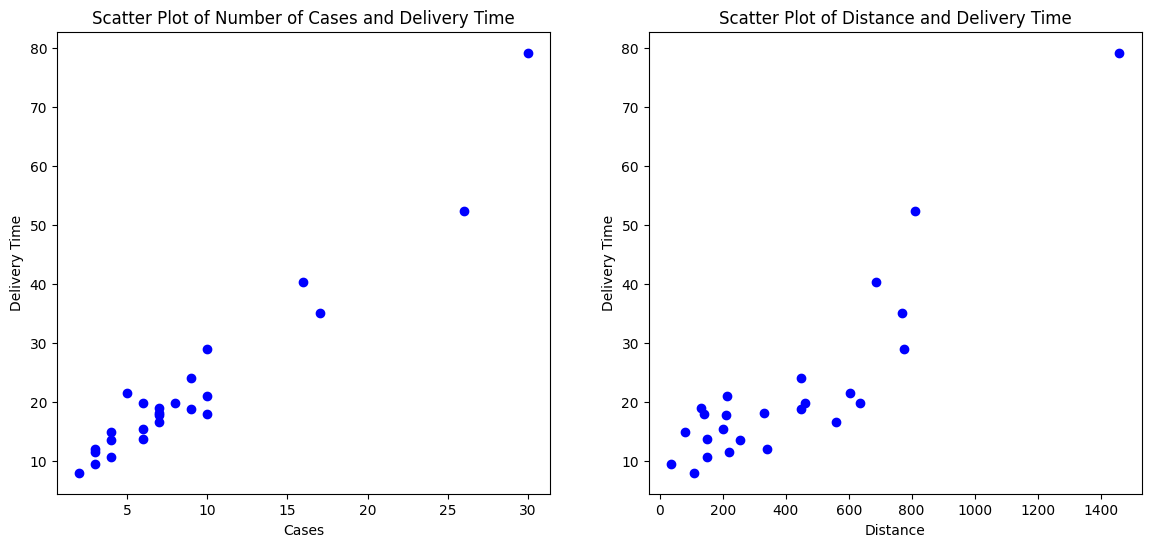

In [16]:
# Visualize the results
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14, 6]

fig, (ax1, ax2) = plt.subplots(1, 2)

#left plot
ax1.scatter(delivery_df.nprod, delivery_df.delTime, color='blue')
ax1.set_title('Scatter Plot of Number of Cases and Delivery Time')
ax1.set_xlabel('Cases')
ax1.set_ylabel('Delivery Time')

#right plot
ax2.scatter(delivery_df.distance, delivery_df.delTime, color='blue')
ax2.set_title('Scatter Plot of Distance and Delivery Time')
ax2.set_xlabel('Distance')
ax2.set_ylabel('Delivery Time')
plt.show();

ValueError: x and y must be the same size

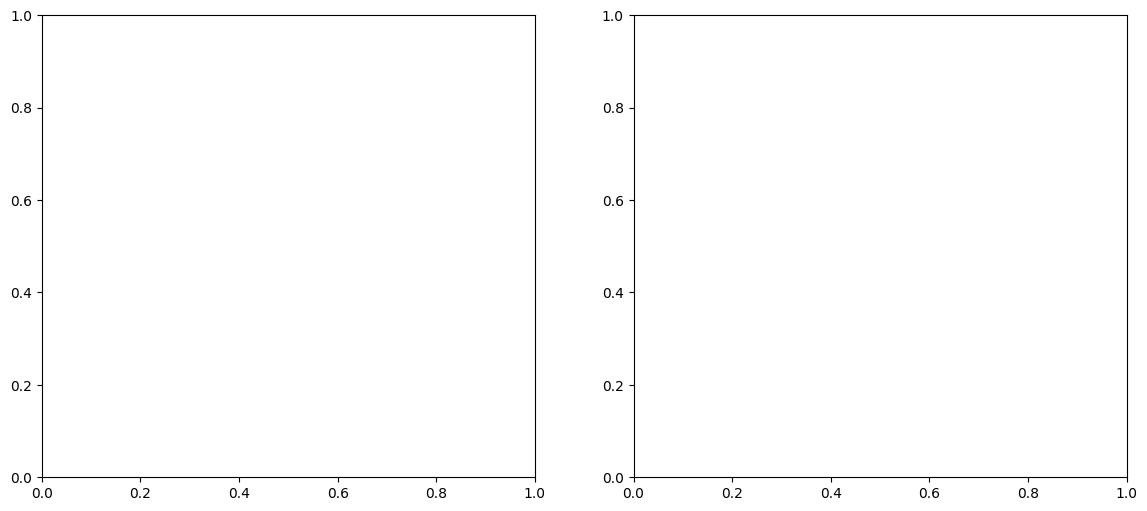

In [23]:

plt.rcParams['figure.figsize'] = [14, 6]

fig, (ax1, ax2) = plt.subplots(1, 2)

#left plot
ax1.scatter(delivery_X_train.nprod, delivery_df.delTime, color='blue')
ax1.set_title('Scatter Plot of Number of Cases and Delivery Time')
ax1.set_xlabel('Cases')
ax1.set_ylabel('Delivery Time')

#right plot
ax2.scatter(delivery_X_train.distance, delivery_df.delTime, color='blue')
ax2.set_title('Scatter Plot of Distance and Delivery Time')
ax2.set_xlabel('Distance')
ax2.set_ylabel('Delivery Time')
plt.show();

We can fit the linear regression with [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) class of sklearn.linear_model submodule.

In [18]:
#Model fitting with scikit-learn
from sklearn.linear_model import LinearRegression

# Create linear regression object
regr = LinearRegression() #fit_intercept=True is the default values

# Train the model using the training sets
regr.fit(delivery_X_train, delivery_y_train)  

LinearRegression()

In [20]:
# Calcualte theta1 and theta2
print(regr.feature_names_in_) #did not work
print(regr.coef_)

['nprod' 'distance']
[1.46859764 0.01213346]


In [21]:
# Calcualte theta0
print(regr.intercept_)

3.718036137441217


The predictive model built has the following form at the _indivudual level_:

$$
\widehat{DelTime}_i  = 3.72 + 1.47 \cdot x_{{nprod}_i} + 0.01 \cdot x_{{distance}_i}.
$$

Lastly, the predictive performance of our built model is as follows:

In [ ]:
# Make predictions on the training set
delivery_y_train_pred = regr.predict(delivery_X_train)

# Generate predictions on the test
delivery_y_test_pred = regr.predict(delivery_X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

print('Training set mean squared error: %.2f'
      % mean_squared_error(delivery_y_train, delivery_y_train_pred))
print('Test set mean squared error: %.2f'
      % mean_squared_error(delivery_y_test, delivery_y_test_pred))

In [ ]:
from sklearn.metrics import r2_score

print('Train R2: %.2f'
      % r2_score(delivery_y_train, delivery_y_train_pred))
print('Test R2: %.2f'
      % r2_score(delivery_y_test, delivery_y_test_pred))

$R^2$ of test data is 0.94. So this indicates that the model is likely to be a very good predictor for new observations.

## References

- https://eli.thegreenplace.net/2015/the-normal-equation-and-matrix-calculus/

In [ ]:
import session_info
session_info.show()